In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
df = pd.read_csv('AAPL.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007492,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100
...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700


In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df = df[['Date', 'Adj Close']]
df.head()

,Date,Adj Close
0,2022-01-03,180.959732
1,2022-01-04,178.663071
2,2022-01-05,173.910660
3,2022-01-06,171.007492
4,2022-01-07,171.176529


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
del df['Date']
df.head()

/var/folders/wk/1__f0f457zs4shb5sgjd_4x40000gn/T/ipykernel_5272/1320865760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,Adj Close
Date,
2022-01-03,180.959732
2022-01-04,178.663071
2022-01-05,173.910660
2022-01-06,171.007492
2022-01-07,171.176529


In [7]:
df_interpol = df.resample("D")\
                .mean()
df_interpol['Adj Close'] = df_interpol['Adj Close'].interpolate()
df_interpol.tail()

,Adj Close
Date,
2022-12-26,130.487500
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


In [8]:
df_interpol.isna().sum()

Adj Close    0
dtype: int64

In [9]:
df.sort_index(inplace=True)

In [10]:
df.tail()

,Adj Close
Date,
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


In [11]:
# df['Adj Close'].interpolate(option='time')

<AxesSubplot: xlabel='Date'>

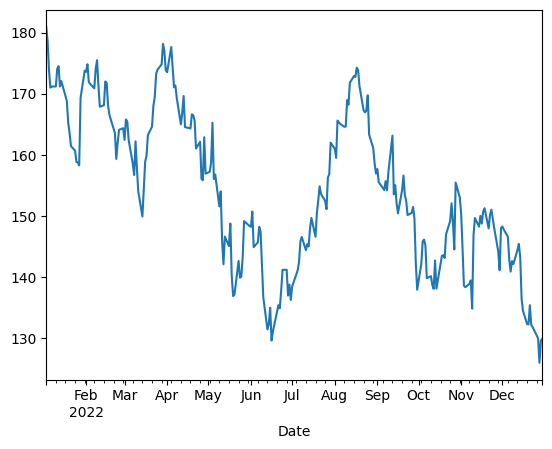

In [12]:
df_interpol['Adj Close'].plot()

In [13]:
n = int(len(df_interpol)*0.9)
train = df_interpol[:n]
test = df_interpol[n:]

display(train.tail(), test.head())

,Adj Close
Date,
2022-11-19,150.196660
2022-11-20,149.103328
2022-11-21,148.009995
2022-11-22,150.179993
2022-11-23,151.070007


,Adj Close
Date,
2022-11-24,149.590004
2022-11-25,148.110001
2022-11-26,146.813334
2022-11-27,145.516668
2022-11-28,144.220001


In [21]:
train.shape

(325, 1)

In [15]:
from pycaret.time_series import *

exp=setup(data=train, target='Adj Close', fh=37)

,Description,Value
0,session_id,2739
1,Target,Adj Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(325, 1)"
5,Transformed data shape,"(325, 1)"
6,Transformed train set shape,"(288, 1)"
7,Transformed test set shape,"(37, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [16]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,325.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,155.88651
3,Summary,Statistics,Transformed,Median,,155.551956
4,Summary,Statistics,Transformed,Standard Deviation,,12.100566
5,Summary,Statistics,Transformed,Variance,,146.423688
6,Summary,Statistics,Transformed,Kurtosis,,-1.055756
7,Summary,Statistics,Transformed,Skewness,,-0.065611
8,Summary,Statistics,Transformed,# Distinct Values,,319.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",3955.849444


In [17]:
exp.plot_model(plot='train_test_split')

In [18]:
top10 = compare_models(
    turbo=False,
    n_select=10,
    sort='RMSE',
    round=2
)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.05,1.07,9.03,10.61,0.06,0.06,-1.71,0.48
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.07,1.12,9.22,11.08,0.06,0.06,-1.91,0.29
arima,ARIMA,1.13,1.15,9.68,11.40,0.06,0.07,-1.76,0.04
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.14,1.15,9.80,11.41,0.06,0.07,-1.64,0.28
grand_means,Grand Means Forecaster,1.17,1.18,10.00,11.60,0.07,0.06,-1.74,0.40
theta,Theta Forecaster,1.20,1.20,10.32,11.85,0.07,0.07,-1.95,0.42
naive,Naive Forecaster,1.20,1.20,10.33,11.87,0.07,0.07,-1.93,1.38
auto_arima,Auto ARIMA,1.20,1.20,10.33,11.87,0.07,0.07,-1.93,0.50
snaive,Seasonal Naive Forecaster,1.24,1.25,10.64,12.34,0.07,0.07,-2.01,0.47
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.22,1.26,10.46,12.44,0.07,0.07,-2.50,0.39


In [19]:
for model in top10:
    exp.plot_model(model)

In [23]:
prophet = exp.create_model('prophet', fold=3)
plot_model(prophet)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-06-28,2.6713,2.5690,22.9904,25.7464,0.1497,0.1649,-9.5846
1,2022-08-04,1.2381,1.3548,10.4710,13.1645,0.0655,0.0627,-3.1148
2,2022-09-10,3.3293,3.1031,28.7396,30.5136,0.1991,0.1787,-18.8112
Mean,NaT,2.4129,2.3423,20.7337,23.1415,0.1381,0.1354,-10.5036
SD,NaT,0.8731,0.7315,7.6269,7.3183,0.0551,0.0518,6.4409
